<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/try/opencv0301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import cv2

# 讀取圖像
img = cv2.imread('plates.webp')

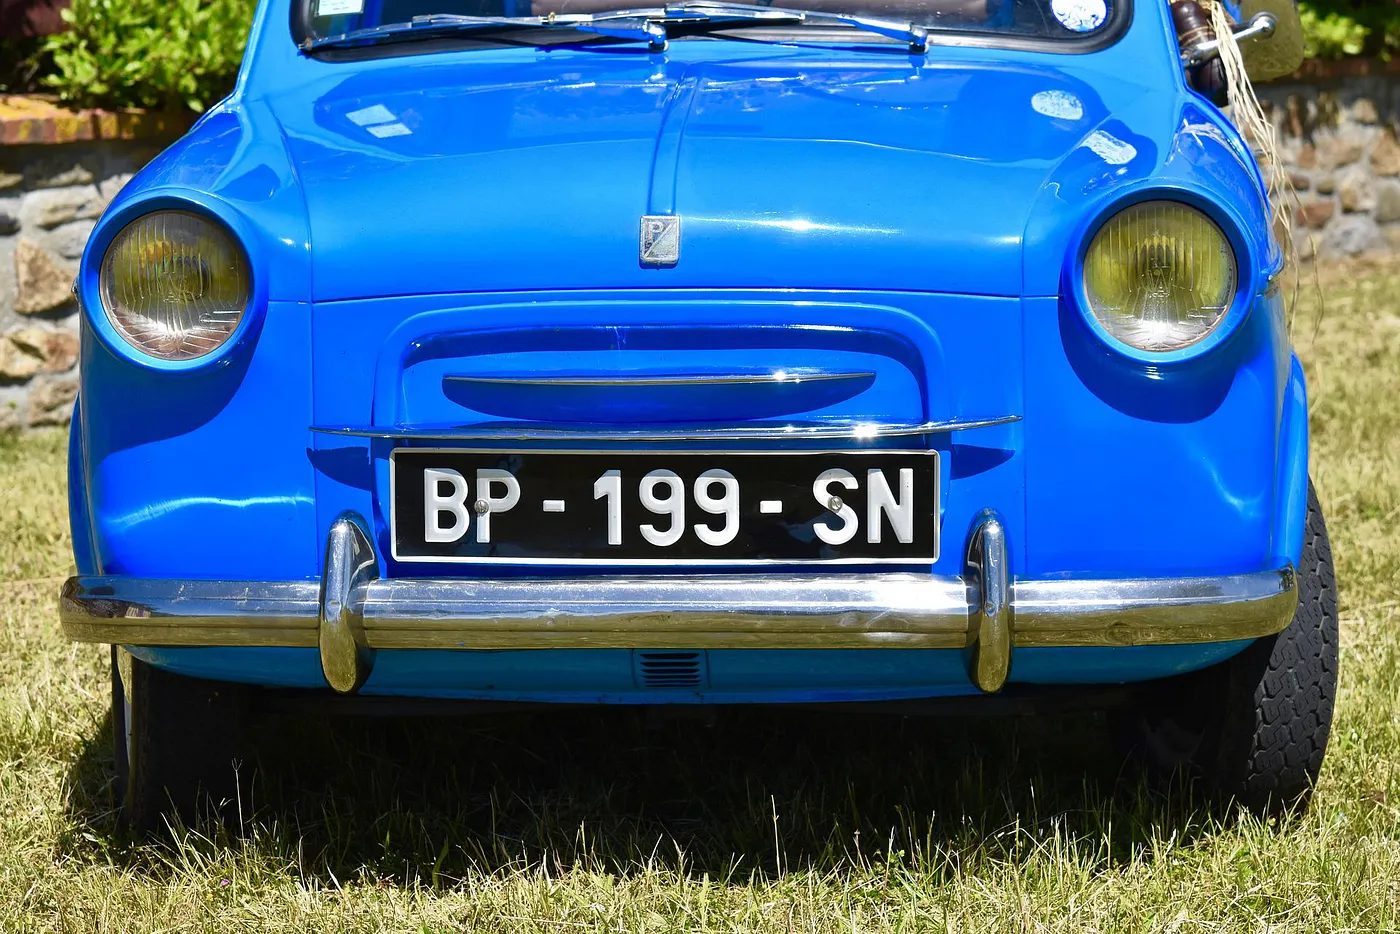

In [65]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [66]:
#轉換成灰度圖像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [67]:
#模糊處理
img_blur = cv2.GaussianBlur(gray, (19,19), 0)

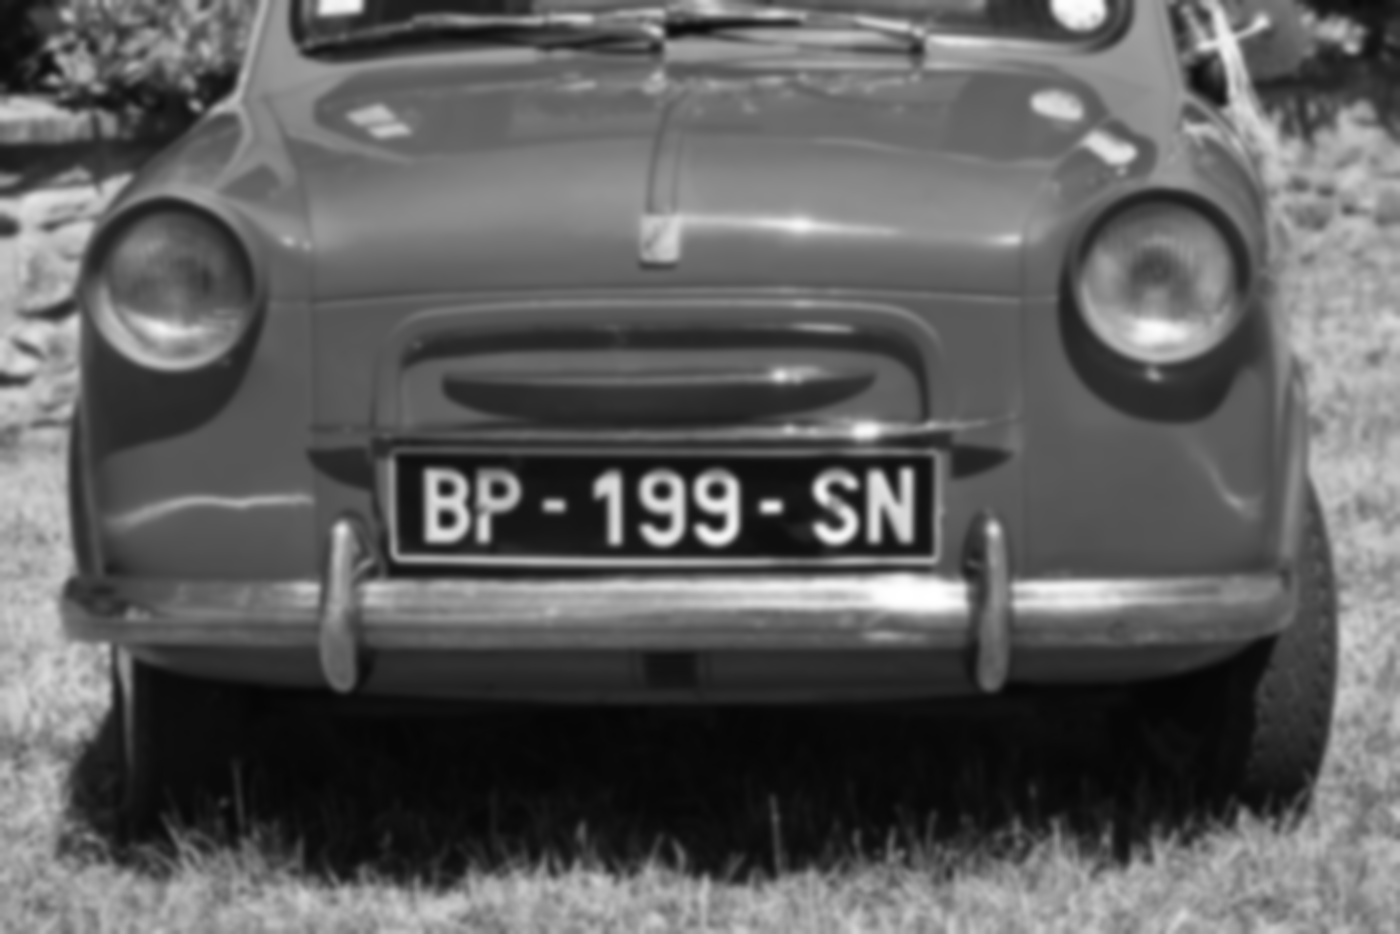

In [68]:
cv2_imshow(img_blur)

In [69]:
#邊緣檢測
img_canny = cv2.Canny(img_blur, 30, 150)

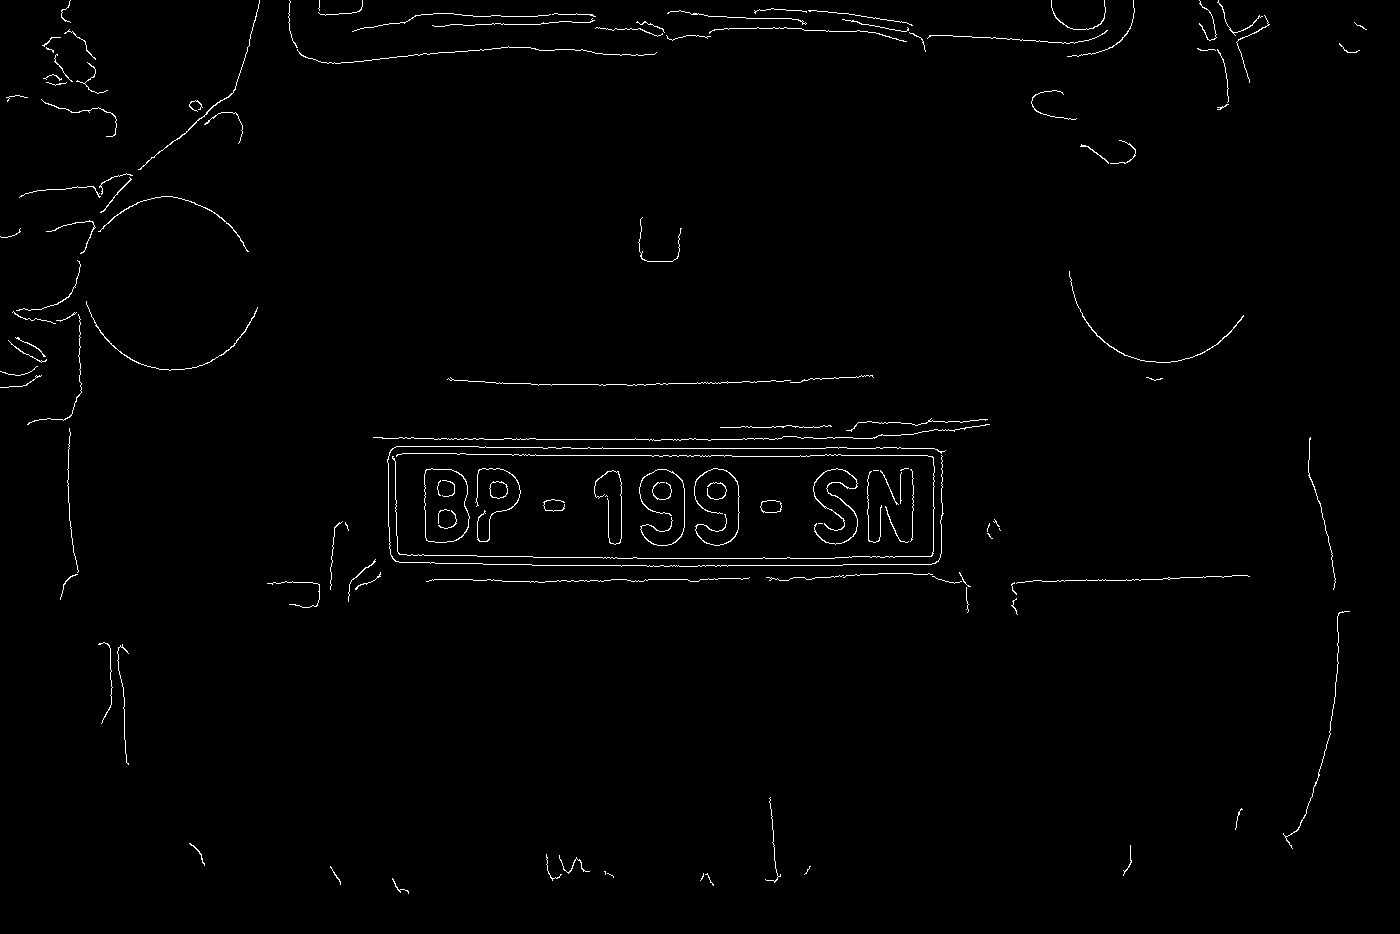

In [70]:
cv2_imshow(img_canny)

In [71]:
#提取車牌輪廓

contours, hierarchy = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
for item in contours:
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    weight = rect[2]
    height = rect[3]
    if weight / height > 4:
        cv2.rectangle(img, (x, y), (x+weight, y+height), (0, 0, 255), 3)

In [72]:
crop_img =gray[y:y+height][x:x+weight]